In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [65]:
df = pd.read_csv('Bike.csv')

In [66]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [67]:
df.shape

(730, 16)

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [69]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [70]:
df['dteday'] = pd.to_datetime(df['dteday'])

In [71]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


# Data Cleaning and Analysis

In [72]:
# converting the season, weathersit, mnth, weekday columns from numerical values to categorical variables
df.season = df.season.map({1: 'spring',2: 'summer', 3: 'fall', 4: 'winter'})
df.weathersit = df.weathersit.map({1:'Best', 2: 'Neutral', 3: 'Bad', 4: 'Worse'})
df.mnth = df.mnth.map({1: 'Jan',2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
df.weekday = df.weekday.map({1:'Mon', 2:'Tue', 3:'Wed', 4:'Thu', 5:'Fri', 6:'Sat', 7:'Sun'})
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2018-01-01,spring,0,Jan,0,Mon,1,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,2018-02-01,spring,0,Jan,0,Tue,1,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,2018-03-01,spring,0,Jan,0,Wed,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,2018-04-01,spring,0,Jan,0,Thu,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,2018-05-01,spring,0,Jan,0,Fri,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600



Note: For the column weathersit, the alias is


Best : Clear, Few clouds, Partly cloudy, Partly cloudy


Neutral: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist


Bad : Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
 

Worse : Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [73]:
df= df.drop('instant',axis=1) # 'instant' column is very insingnificant 

In [74]:
df.insert(4, 'day', '')
df['day'] = pd.DatetimeIndex(df['dteday']).day
df.head()

,dteday,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2018-01-01,spring,0,Jan,1,0,Mon,1,Neutral,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2018-02-01,spring,0,Jan,1,0,Tue,1,Neutral,14.902598,17.68695,69.6087,16.652113,131,670,801
2,2018-03-01,spring,0,Jan,1,0,Wed,1,Best,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,2018-04-01,spring,0,Jan,1,0,Thu,1,Best,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,2018-05-01,spring,0,Jan,1,0,Fri,1,Best,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [75]:
print('------------------Day Values------------------')
print(df.day.value_counts())
print('--------------Workingday Values---------------')
print(df.workingday.value_counts())
print('--------------Weekday values---------------')
print(df.weekday.value_counts())

------------------Day Values------------------
1     24
26    24
11    24
10    24
9     24
8     24
7     24
6     24
5     24
4     24
3     24
2     24
28    24
13    24
27    24
25    24
24    24
23    24
22    24
21    24
20    24
19    24
18    24
17    24
16    24
15    24
14    24
12    24
29    22
30    22
31    14
Name: day, dtype: int64
--------------Workingday Values---------------
1    504
0    226
Name: workingday, dtype: int64
--------------Weekday values---------------
Mon    105
Tue    105
Wed    104
Thu    104
Fri    104
Sat    104
Name: weekday, dtype: int64


In [76]:
df = df.drop('dteday',axis = 1)

# Data Visualization

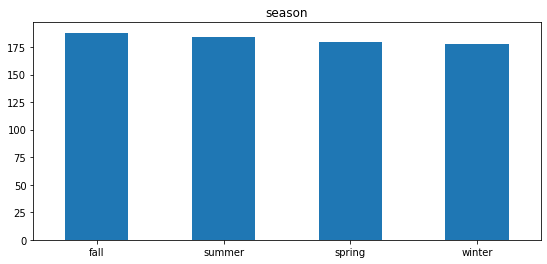

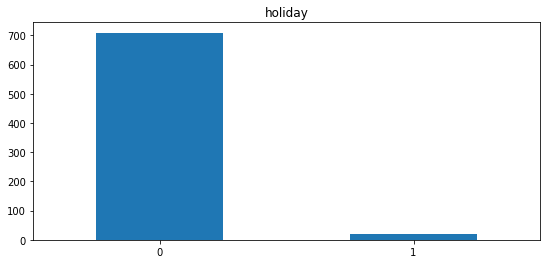

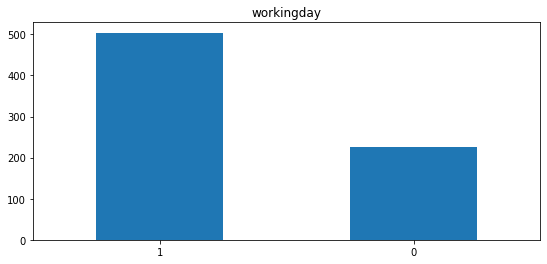

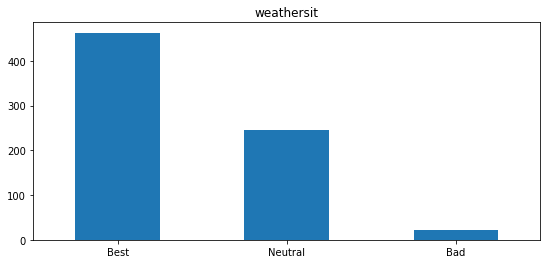

In [77]:
# univariate analysis of some significant categorical varibales
univariate_categorical_cols=['season','holiday','workingday','weathersit']
for column in univariate_categorical_cols:
  plt.figure(figsize=(20,4))
  plt.subplot(121)
  df[column].value_counts().plot(kind = 'bar')
  plt.xticks(rotation = 360)
  plt.title(column)

In [78]:
print('Number of holidays in 2018: ',len(df[(df['holiday']==1) & (df['yr']==0)]))
print('Number of holidays in 2019: ',len(df[(df['holiday']==1) & (df['yr']==1)]))

Number of holidays in 2018:  10
Number of holidays in 2019:  11


[Text(0, 0.5, 'cnt'),
 Text(0.5, 0, 'workingday'),
 Text(0.5, 1.0, 'Boxplot for cnt vs workingday')]

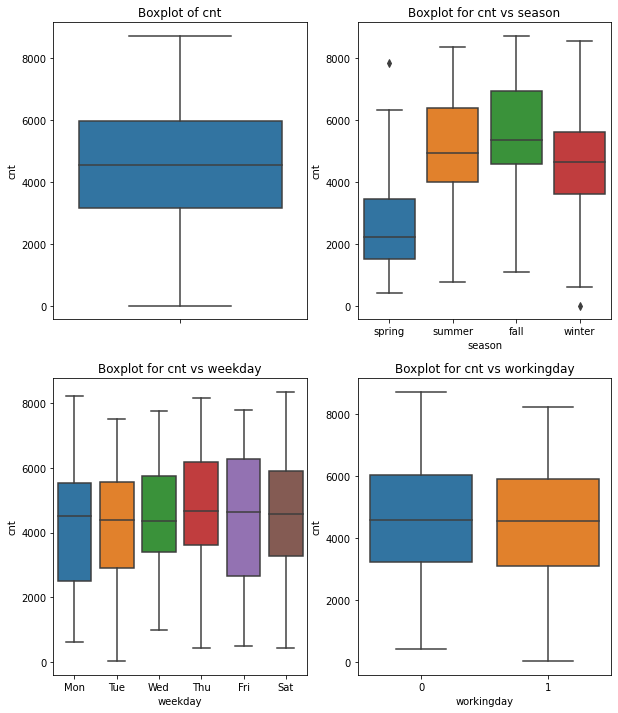

In [79]:
from matplotlib import axes
# Check the outliers 
fig, axes = plt.subplots(nrows = 2, ncols=2)
fig.set_size_inches(10,12)
sns.boxplot(data = df, y='cnt', orient = 'v', ax = axes[0][0])
sns.boxplot(data= df, x='season', y='cnt', orient = 'v', ax = axes[0][1])
sns.boxplot(data= df, x='weekday', y='cnt', orient = 'v', ax = axes[1][0])
sns.boxplot(data= df, x='workingday', y='cnt', orient = 'v', ax = axes[1][1])


axes[0][0].set(ylabel='cnt',title = "Boxplot of cnt")
axes[0][1].set(xlabel="season",ylabel="cnt",title="Boxplot for cnt vs season")
axes[1][0].set(xlabel="weekday", ylabel="cnt",title="Boxplot for cnt vs weekday")
axes[1][1].set(xlabel="workingday",ylabel="cnt",title="Boxplot for cnt vs workingday")



In [80]:
corrmat = df.corr()
corrmat

,yr,day,holiday,workingday,temp,atemp,hum,windspeed,casual,registered,cnt
yr,1.000000e+00,-2.249057e-16,0.008195,-0.011852,0.048789,0.047215,-0.112547,-0.011624,0.250502,0.596911,0.569728
day,-2.249057e-16,1.000000e+00,0.004536,-0.002411,0.081898,0.078212,0.096106,-0.027370,0.024244,0.040821,0.041484
holiday,8.195345e-03,4.535910e-03,1.000000,-0.257009,-0.028764,-0.032703,-0.015662,0.006257,0.054055,-0.109142,-0.068764
workingday,-1.185197e-02,-2.410535e-03,-0.257009,1.000000,0.002044,0.010657,0.053770,-0.002453,-0.090369,0.005466,-0.027640
temp,4.878919e-02,8.189816e-02,-0.028764,0.002044,1.000000,0.991696,0.128565,-0.158186,0.542731,0.539436,0.627044
atemp,4.721519e-02,7.821203e-02,-0.032703,0.010657,0.991696,1.000000,0.141512,-0.183876,0.543362,0.543678,0.630685
hum,-1.125471e-01,9.610618e-02,-0.015662,0.053770,0.128565,0.141512,1.000000,-0.248506,-0.075211,-0.089212,-0.098543
windspeed,-1.162435e-02,-2.736954e-02,0.006257,-0.002453,-0.158186,-0.183876,-0.248506,1.000000,-0.167995,-0.217914,-0.235132
casual,2.505017e-01,2.424398e-02,0.054055,-0.090369,0.542731,0.543362,-0.075211,-0.167995,1.000000,0.394137,0.672123
registered,5.969106e-01,4.082092e-02,-0.109142,0.005466,0.539436,0.543678,-0.089212,-0.217914,0.394137,1.000000,0.945411


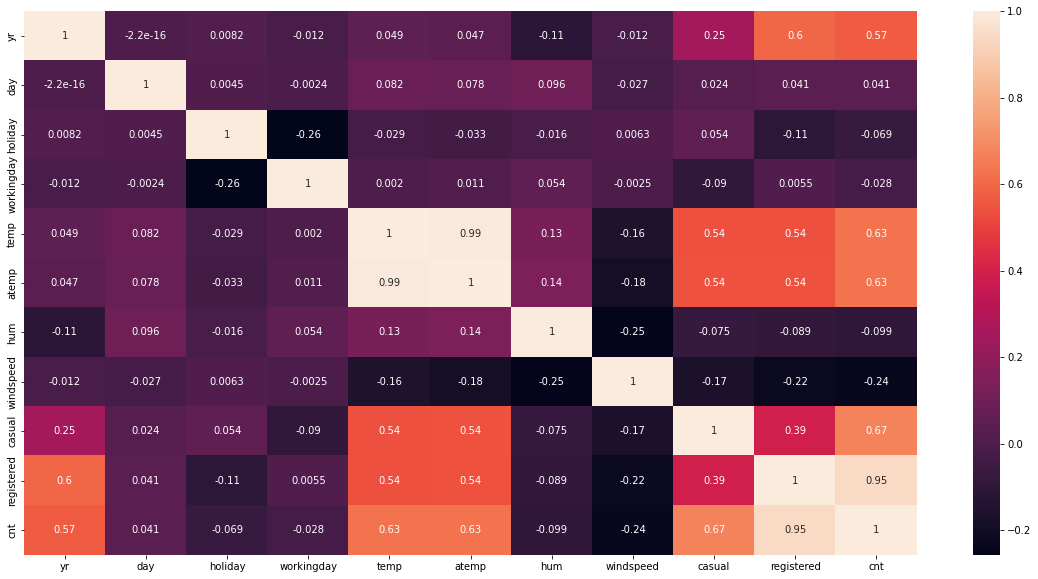

In [81]:
plt.figure(figsize=(20,10))
sns.heatmap(corrmat,annot = True,)

In [82]:
univarriate_numerical_cols = list(df.select_dtypes(include = np.number))
univariate_continuous_var= [ i for i in univarriate_numerical_cols if i not in ['yr','mnth','day','holiday','weekday','workingday']]
univariate_continuous_var

['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']

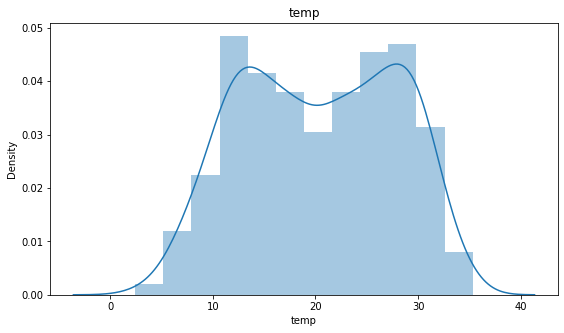

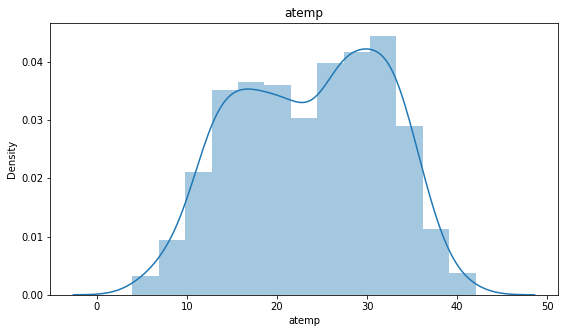

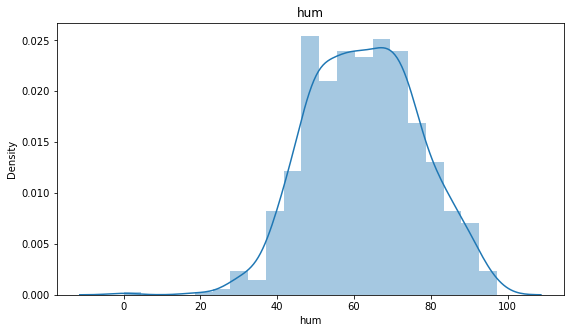

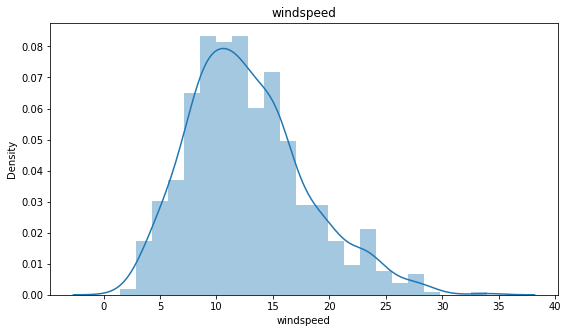

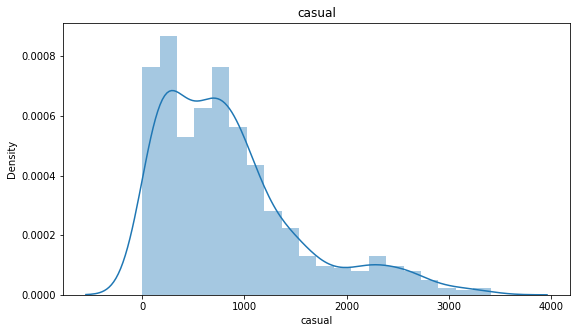

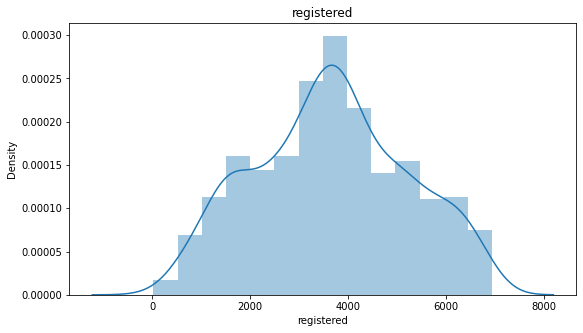

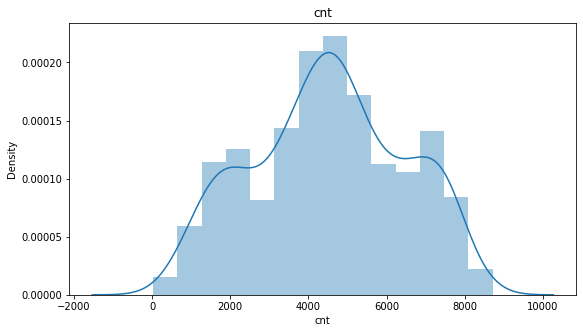

In [83]:
for column in univariate_continuous_var:
  plt.figure(figsize=(20,5))
  plt.subplot(121)
  sns.distplot(df[column])
  plt.title(column)

<Figure size 1440x1080 with 0 Axes>

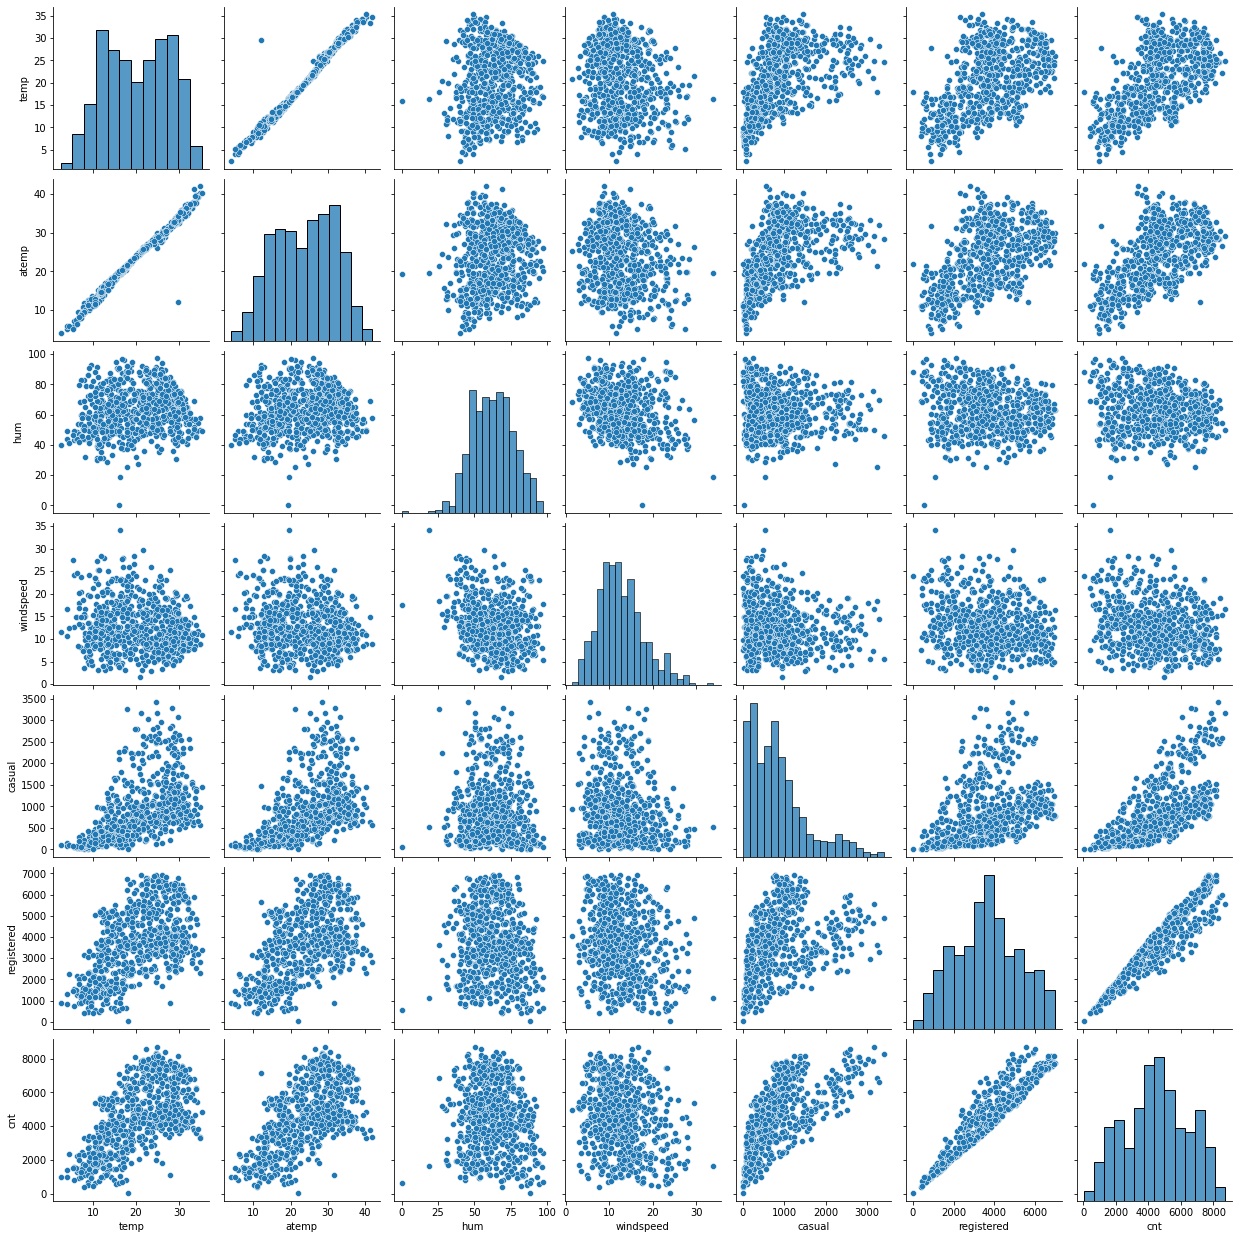

In [84]:
# Bivariate analysis
plt.figure(figsize=(20,15))
sns.pairplot(df[univariate_continuous_var])

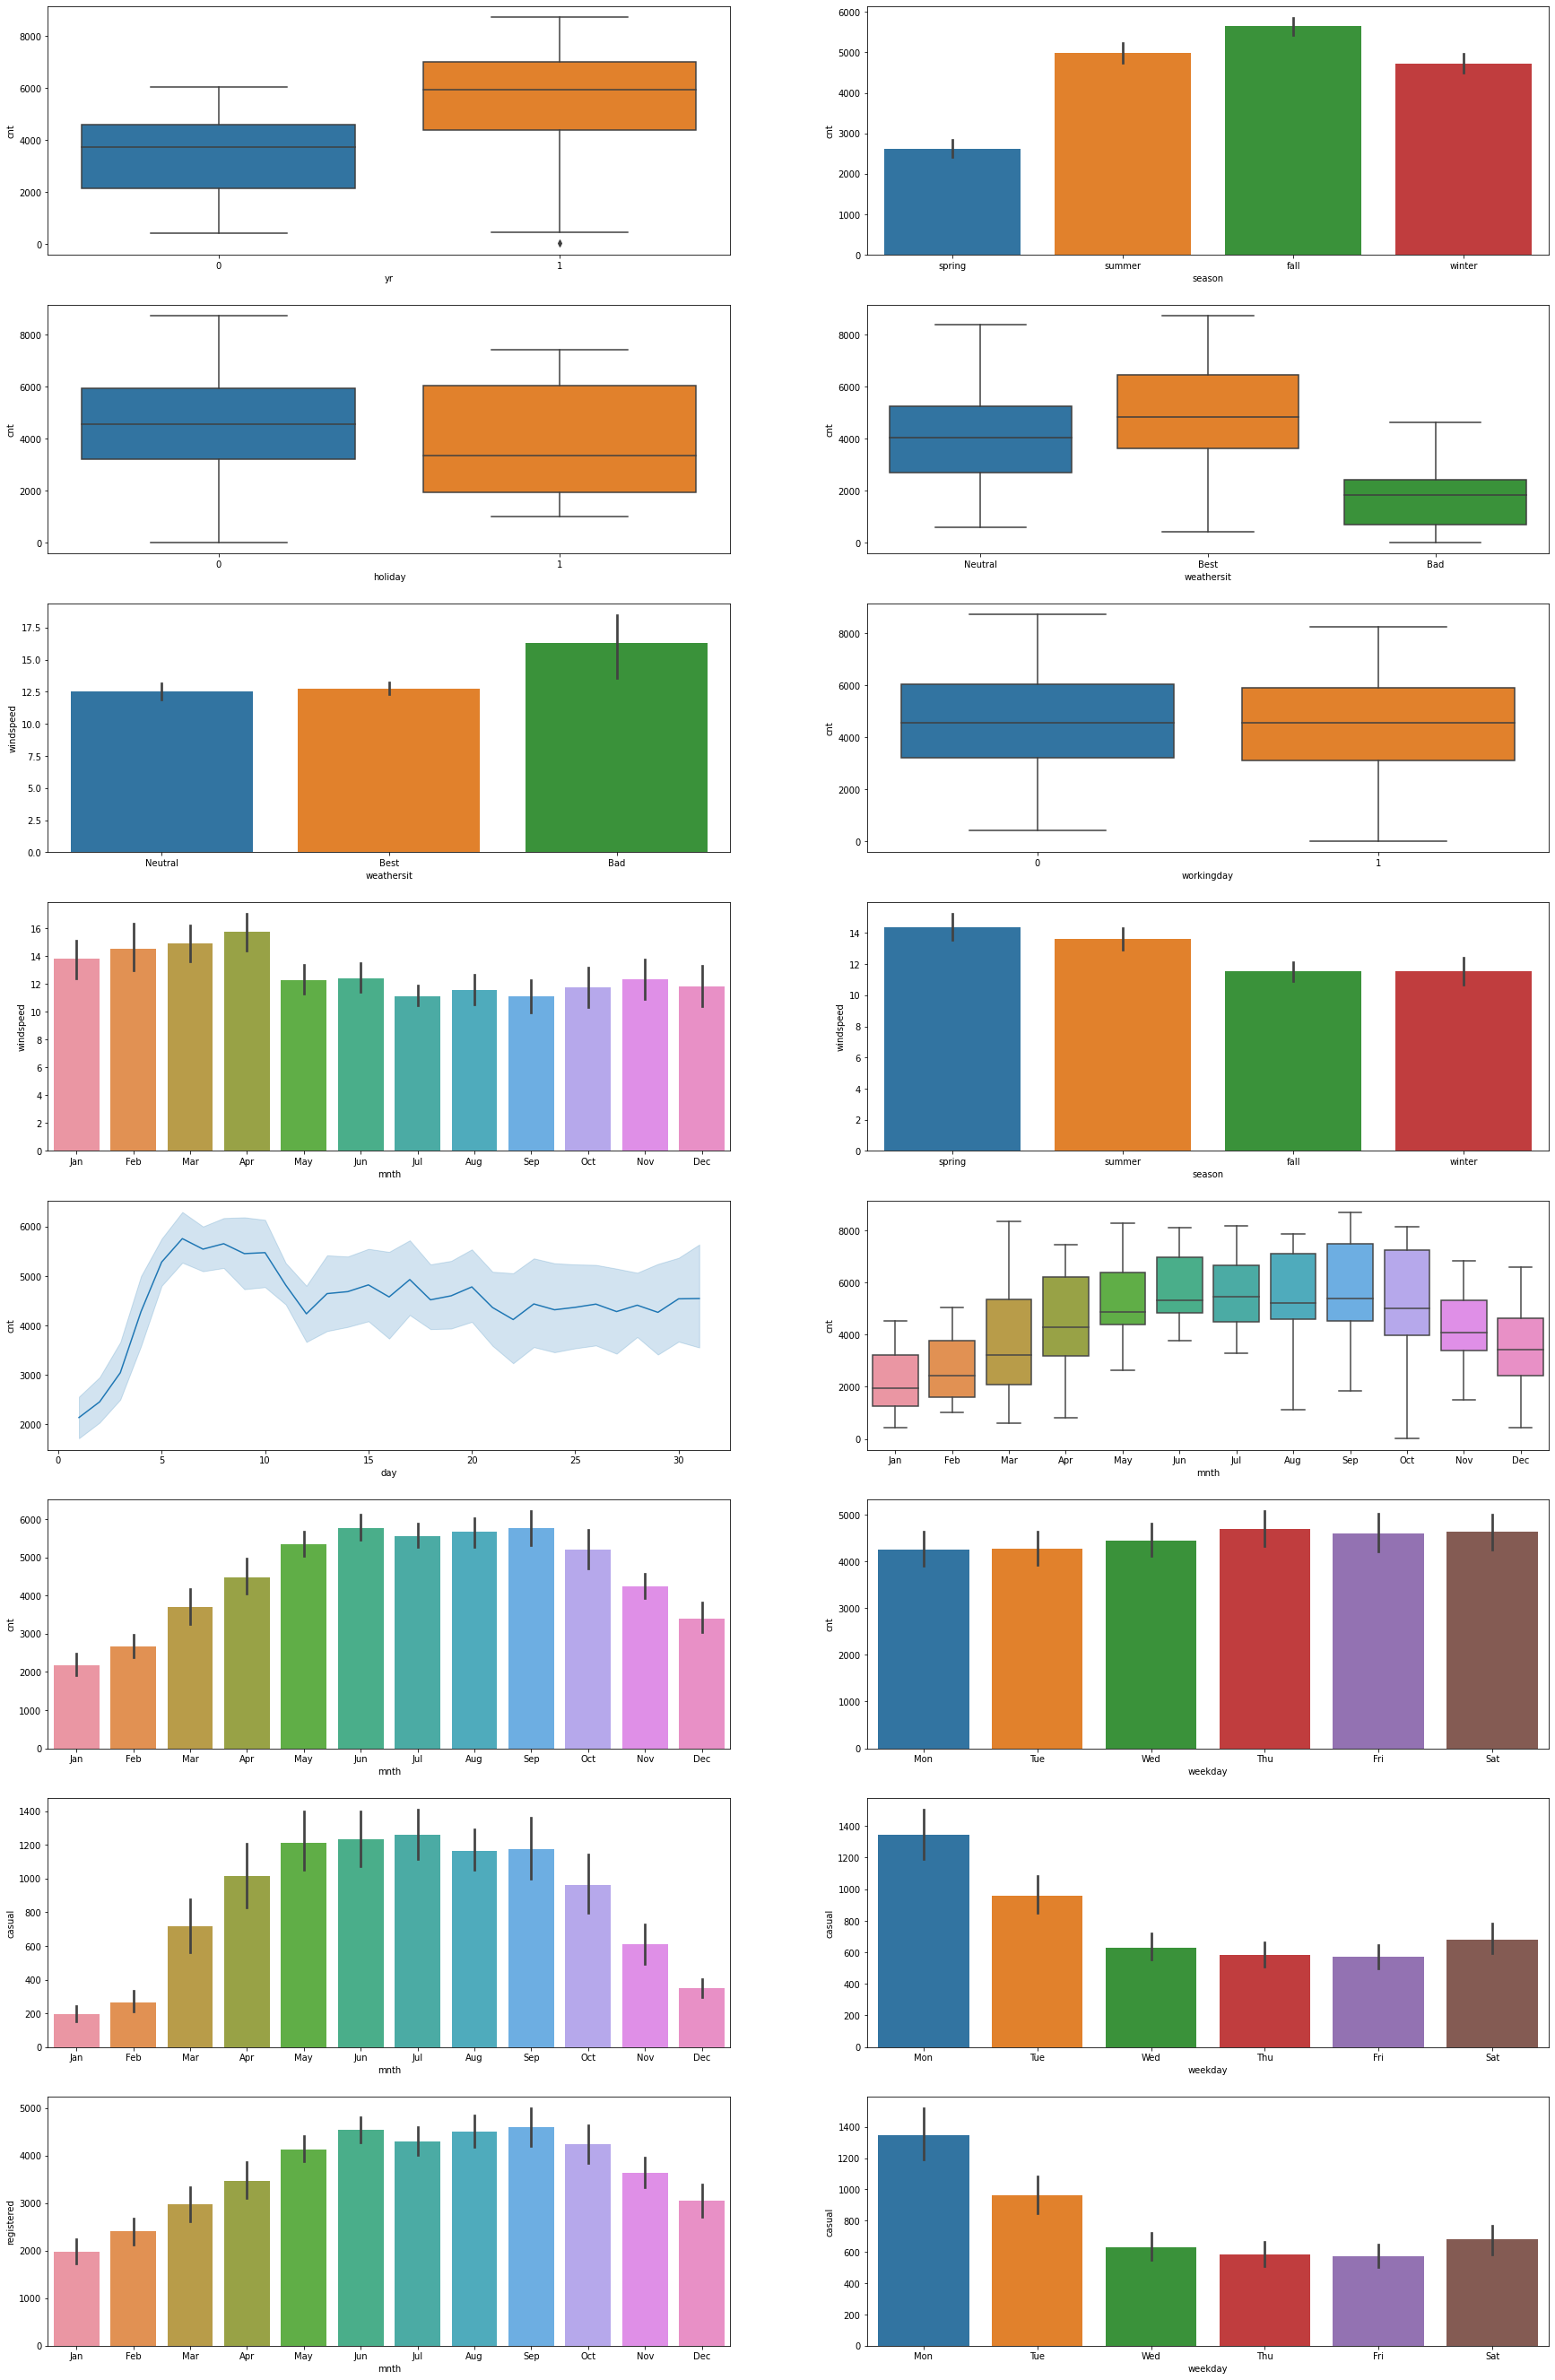

In [85]:


#Bivariate analysis of categorical variables with cnt
plt.figure(figsize=(30,48))
plt.subplot(8,2,1)
sns.boxplot(x='yr', y='cnt', data=df)

plt.subplot(8,2,2)
sns.barplot(x='season', y='cnt', data=df)

plt.subplot(8,2,3)
sns.boxplot(x='holiday', y='cnt', data=df)

plt.subplot(8,2,4)
sns.boxplot(x='weathersit', y='cnt', data=df)

plt.subplot(8,2,5)
sns.barplot(x='weathersit', y='windspeed', data=df)

plt.subplot(8,2,6)
sns.boxplot(x='workingday', y='cnt', data=df)

plt.subplot(8,2,7)
sns.barplot(x='mnth', y='windspeed', data=df)

plt.subplot(8,2,8)
sns.barplot(x='season', y='windspeed', data=df)

plt.subplot(8,2,9)
sns.lineplot(x='day', y='cnt', data=df)

plt.subplot(8,2,10)
sns.boxplot(x = 'mnth', y = 'cnt', data = df)

plt.subplot(8,2,11)
sns.barplot(x='mnth', y='cnt', data=df)

plt.subplot(8,2,12)
sns.barplot(x='weekday', y='cnt', data=df)

plt.subplot(8,2,13)
sns.barplot(x='mnth', y='casual', data=df)

plt.subplot(8,2,14)
sns.barplot(x='weekday', y='casual', data=df)

plt.subplot(8,2,15)
sns.barplot(x='mnth', y='registered', data=df)

plt.subplot(8,2,16)
sns.barplot(x='weekday', y='casual', data=df)

plt.show()



Inferences

    1. The cnt in the year 2019 was way more than that in 2018. The 75th percentile of the cnt in 2018 is almost equivalent to 25 percentile in 2019.
    
    2. Number of bikes booked according to seasons in a decreasing order: Fall, Summer, Winter and Spring.
    
    3. The trend of increasing use of bike starts from january(lowest) till June then stays almost the same till september and then starts dropping. There's a scope to increase the bike usage in the months from january till May and from October to december. The drop of bike usage from october till December might be explained by the winter season and less bike usage from January to April might be explained by higher windspeed.
    
    4. Days of the week doesn't matter much. Almost similar number of bikes are rented same number of times everyday in a week but Monday and tuesday have relatively less bookings.
    
    5. The average count of bikes rented is more during non-public holidays.
    
    6. The average count of bikes rented when the weather is situation is 'Clear, Few clouds, Partly cloudy, Partly cloudy' or 'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist' termed as 'Best' and 'Neutral' is much more compared to other situations termed as 'Bad' and 'Worse'- Wind speed during the bad weather situations is more than 'Best' and 'neautral' weather situations and hence more number of bikes are rented in such situations.
    
    7. The line-graph trend shows that the count of bikes rented is least from 1st-4th day, peaks from 6th-10th day in a month and again dips till 13th day and kind of stays almost constant throughout the month.

As causal + registered = cnt. Let's drop them since they are irrelevant

Also as the temp and atemp are very highly correlated and there colinearities with cnt are also same, we are dropping atemp since feeling temprature can be relatively less accurate compared to temperature.


In [86]:
df = df.drop(["casual","registered","atemp"],axis = 1)
df.head()

,season,yr,mnth,day,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,spring,0,Jan,1,0,Mon,1,Neutral,14.110847,80.5833,10.749882,985
1,spring,0,Jan,1,0,Tue,1,Neutral,14.902598,69.6087,16.652113,801
2,spring,0,Jan,1,0,Wed,1,Best,8.050924,43.7273,16.636703,1349
3,spring,0,Jan,1,0,Thu,1,Best,8.200000,59.0435,10.739832,1562
4,spring,0,Jan,1,0,Fri,1,Best,9.305237,43.6957,12.522300,1600


In [87]:
#Creating Dummy variables

def dummies(x,dataframe):
    temp = pd.get_dummies(dataframe[x], drop_first = True)
    dataframe = pd.concat([dataframe, temp], axis = 1)
    dataframe.drop([x], axis = 1, inplace = True)
    return dataframe
# Applying the function to the bikeSharing

df = dummies('season',df)
df = dummies('mnth',df)
df = dummies('weekday',df)
df = dummies('weathersit',df)
df.head()

,yr,day,holiday,workingday,temp,hum,windspeed,cnt,spring,summer,...,Nov,Oct,Sep,Mon,Sat,Thu,Tue,Wed,Best,Neutral
0,0,1,0,1,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,1,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,1,8.050924,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,0,1,0


In [88]:
# selecting predictors
X = df.iloc[:,df.columns != 'cnt']
# selecting target class
y = df.iloc[:,df.columns == 'cnt']

In [89]:
X

,yr,day,holiday,workingday,temp,hum,windspeed,spring,summer,winter,...,Nov,Oct,Sep,Mon,Sat,Thu,Tue,Wed,Best,Neutral
0,0,1,0,1,14.110847,80.5833,10.749882,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,1,0,1,14.902598,69.6087,16.652113,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,1,0,1,8.050924,43.7273,16.636703,1,0,0,...,0,0,0,0,0,0,0,1,1,0
3,0,1,0,1,8.200000,59.0435,10.739832,1,0,0,...,0,0,0,0,0,1,0,0,1,0
4,0,1,0,1,9.305237,43.6957,12.522300,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,1,27,0,1,10.420847,65.2917,23.458911,1,0,0,...,0,0,0,0,0,0,0,0,0,1
726,1,28,0,0,10.386653,59.0000,10.416557,1,0,0,...,0,0,0,0,1,0,0,0,0,1
727,1,29,0,0,10.386653,75.2917,8.333661,1,0,0,...,0,0,0,0,0,0,0,0,0,1
728,1,30,0,1,10.489153,48.3333,23.500518,1,0,0,...,0,0,0,1,0,0,0,0,1,0


In [90]:
from pandas.core.common import random_state
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=456)

In [91]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

need_rescale=['temp','hum','windspeed']
X_train[need_rescale]=scaler.fit_transform(X_train[need_rescale])
y_train = scaler.fit_transform(y_train)
X_test = scaler.fit_transform(X_test)
y_test = scaler.fit_transform(y_test)


In [92]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(511, 28)
(511, 1)
(219, 28)
(219, 1)


# Model 1: Linear Regression

In [93]:
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [94]:
prediction = lm.predict(X_test)

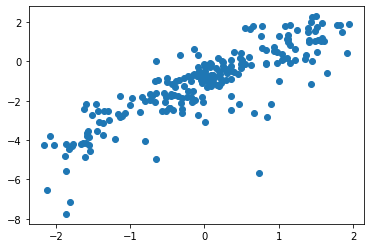

In [95]:
plt.scatter(y_test,prediction)

In [96]:
x = pd.DataFrame(np.exp(prediction))

In [97]:
x.describe()

,0
count,219.000000
mean,1.132802
std,1.799237
min,0.000431
25%,0.112100
50%,0.408903
75%,1.101006
max,9.853671


In [98]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score

In [99]:
print("Mean squared error is ",mean_squared_error(y_test,prediction))
print("Mean absolute error is ", mean_absolute_error(y_test,prediction))

Mean squared error is  2.5834603753896626
Mean absolute error is  1.2368860117077292


In [100]:
np.sqrt(mean_squared_error(y_test, prediction))

1.607314647288969

# Model 2: Random Forest

In [101]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
rf = RandomForestRegressor(random_state = 12345)

In [102]:
rf

RandomForestRegressor(random_state=12345)

In [110]:
np.random.seed(12)

param_dist = {'max_depth': [2,4,6,8,10],
              'bootstrap': [True, False],
              'max_features': ['auto', 'sqrt', 'log2', None],
              'n_estimators': [20,50, 75, 100, 200, 300, 400, 500]
}


cv_randomforest = RandomizedSearchCV(rf, cv = 10, param_distributions=param_dist, n_iter = 10)
cv_randomforest.fit(X_train, y_train)
print('Best Parameters using random search: \n', cv_randomforest.best_params_)


Best Parameters using random search: 
 {'n_estimators': 300, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}


In [104]:
rf.set_params(max_features = 'log2', max_depth = 10, n_estimators = 300)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=12345)

In [105]:
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=8, n_estimators=200, random_state=12345)

In [106]:
y_pred_rf = rf.predict(X_test)

In [107]:


mae = mean_absolute_error(y_test, y_pred_rf)
print('Mean absolute error:', mae, 'degrees.')

Mean absolute error: 0.32409598274673584 degrees.


In [108]:
rsme = np.sqrt(mean_squared_error(y_test,y_pred_rf))

In [109]:
rsme

0.40553666126270455